# MapExtrakt Usage

> First import your model

In [1]:
import torchvision
model = torchvision.models.resnet50(pretrained=True)

> Import MapExtract's Feature Extractor

In [2]:
from MapExtrakt import FeatureExtractor

fe = FeatureExtractor(model,allowed_modules="relu")


### Set image to be analysed - input can be PIL Image, Numpy array or filepath. We are using the path

In [3]:
fe.set_image("pug.jpg")

### Total number or layers available can be viewed

In [4]:
fe.layers

53

### Along with total cells per layer

In [5]:
fe.get_cells(layer_no=10)

256

### Total cells over all layers

In [6]:
fe.get_total_cells()


26507

# Displaying Maps

### Basic layer maps

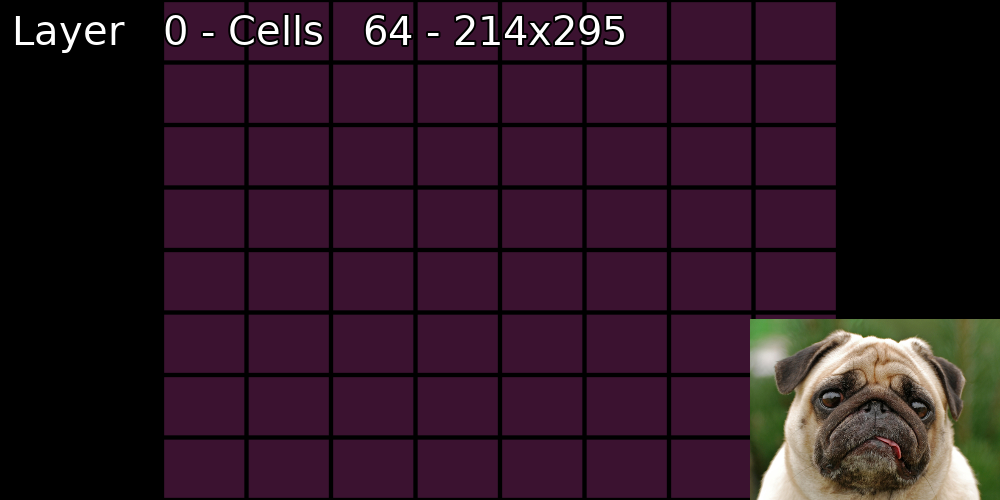

In [7]:
img = fe.display_from_map(layer_no=0, out_type="pil", colourize=20, outsize=(1000,500), border=0.03, picture_in_picture=True)
img

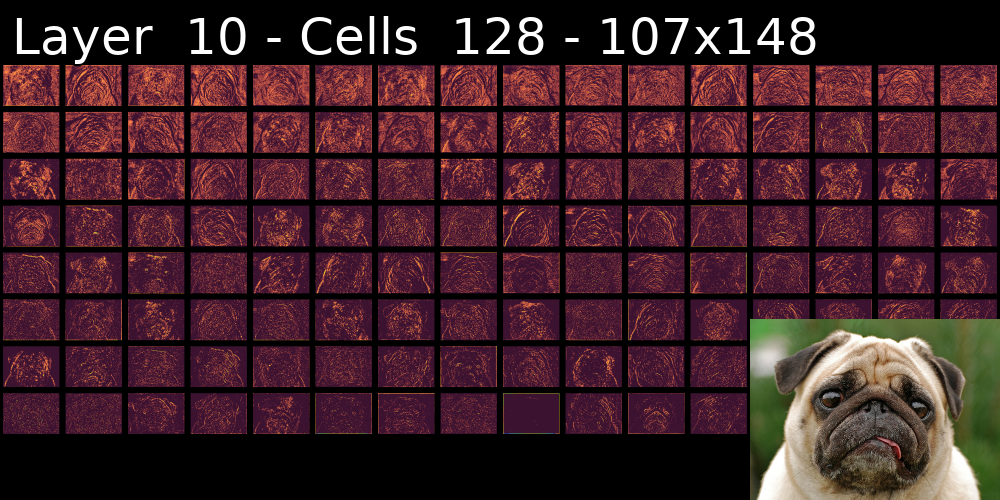

In [8]:

img = fe.display_from_map(layer_no=10, out_type="pil", colourize=20, outsize=(1000,500), border=0.06, picture_in_picture=True)
img

In [9]:
import numpy as np
np.array(img)

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [58, 87, 33],
        [55, 86, 28],
        [52, 85, 28]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [54, 87, 32],
        [54, 87, 32],
        [52, 87, 29]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [53, 88, 29],
        [54, 86, 29],
        [52, 85, 27]]], dtype=uint8)

### Individual cell maps

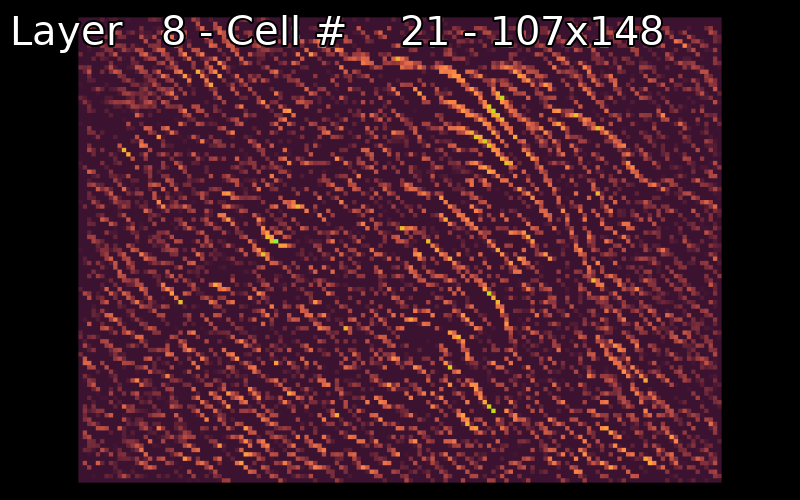

In [10]:

img = fe.display_from_map(layer_no=8, cell_no=20, out_type="pil", colourize=20, outsize=(800,500), border=0.03, picture_in_picture=False)
img.save("example_output2.jpg")
img

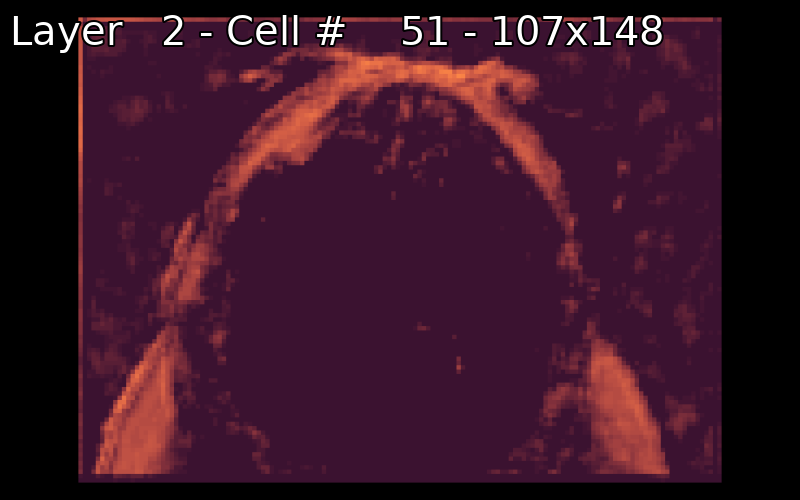

In [11]:
img = fe.display_from_map(layer_no=2, cell_no=50, out_type="pil", colourize=20, outsize=(800,500), border=0.03, picture_in_picture=False)
img.save("example_output3.jpg")
img

### Setting a new image and getting single cell

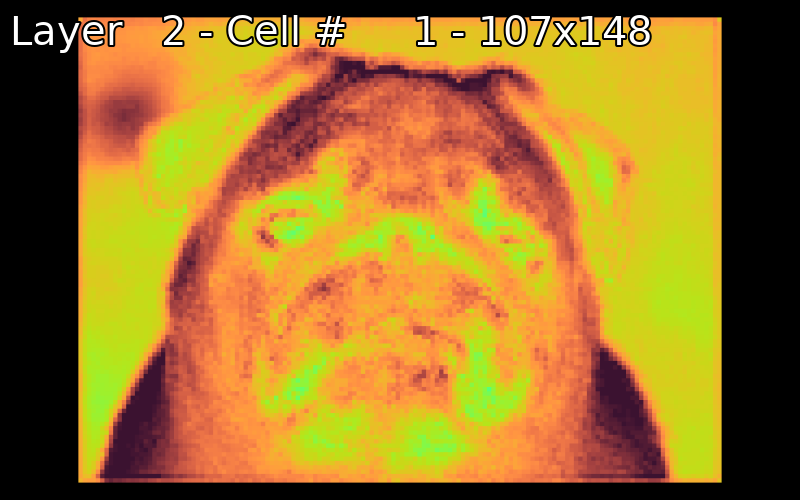

In [12]:
fe.set_image("dog.jpg")
img = fe.display_from_map(layer_no=2, cell_no=0, out_type="pil", colourize=20, outsize=(800,500), border=0.03, picture_in_picture=False)
img

### Changing border and displaying with maps relative size (no size specified) and new colourize style

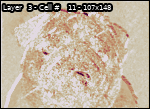

In [13]:
img = fe.display_from_map(layer_no=3, cell_no=10, out_type="pil", colourize=18, border=0.00, picture_in_picture=False)
img

In [14]:
img = fe.display_from_map(layer_no=4, cell_no=85, out_type="pil", colourize=8, border=0.1, picture_in_picture=False)
img

ValueError: Cell number not valid please select from range 0-64

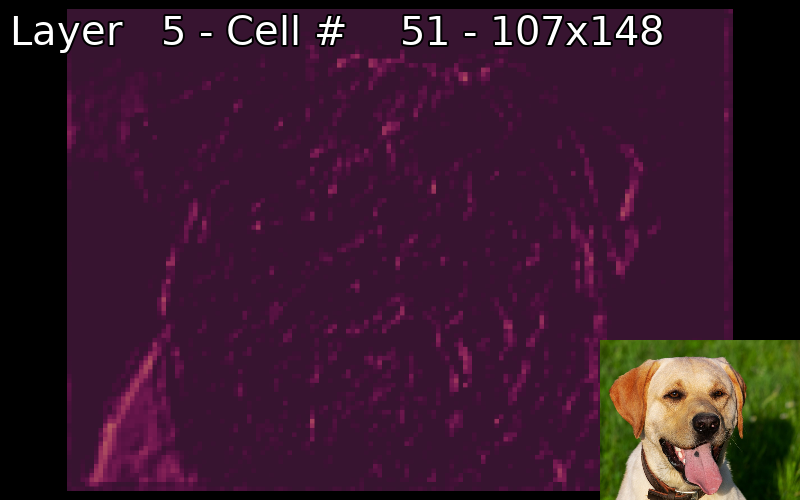

In [15]:
img = fe.display_from_map(layer_no=5, cell_no=50, out_type="pil", colourize=19, outsize=(800,500), border=0.02, picture_in_picture=True)
img

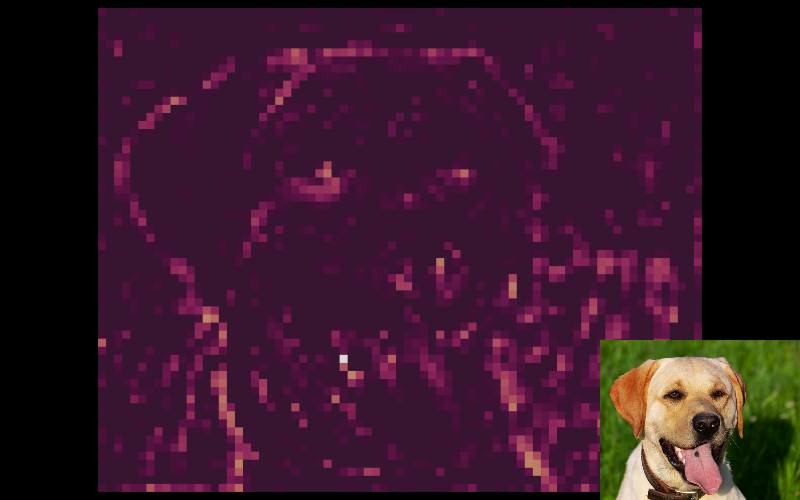

In [38]:
img = fe.display_from_map(layer_no=6, cell_no=122, out_type="pil", colourize=19, outsize=(800,500), border=0.02, picture_in_picture=True)
img

### Save all layer maps to folder

In [14]:
fe.set_image("pug.jpg")

_ = [fe.display_from_map(layer_no=x, out_type="pil",outsize=(1500,800))
     .save(f"./pug_layers/layer{x}.jpg") for x in range(fe.layers)]

### Or save all cells from a layer to folder

In [15]:
fe.set_image("bike.jpg")
layer = 3
_ = [fe.display_from_map(layer_no=layer, cell_no=x, out_type="pil", outsize=(200,150), picture_in_picture=False)
     .save(f"./pug_cells/layer{x}.jpg") for x in range(fe.get_cells(layer))]


### Writing to video

In [16]:
fe.write_video(out_size=(1500,1000), file_name="output1.mp4",
               write_text=True, picture_in_picture=True, draw_type="both")

Drawing Cells 2801 /2801   Total Time Taken 0:05:42    Time Left 0:00:00    [==============================] 100.0 %  
Video saved as output1.mp4


In [ ]:
from MapExtrakt import FeatureExtractor
import torchvision
import torch

file = "/home/lewis/PycharmProjects/mapextrackt/examples/pug.jpg"

net = torchvision.models.resnet101(pretrained=True)
net1 = torchvision.models.alexnet(pretrained=True)
net2 = torchvision.models.googlenet(pretrained=True)
net3 = torchvision.models.inception_v3(pretrained=True)

nets = [(net,"resnet101"),(net1,"alexnet"),(net2,"googlenet"),(net3,"inception_v3")]
for mod, name in nets:
    fe = FeatureExtractor(mod)
    fe.set_image(file)
    fe.write_video(out_size=(1920,1080),file_name=f"{name}_layers_new.mp4",picture_in_picture=False,draw_type="layers")
    fe.write_video(out_size=(1920,1080),file_name=f"{name}_cells_new.mp4",picture_in_picture=False,draw_type="cells")

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /home/lewis/.cache/torch/checkpoints/inception_v3_google-1a9a5a14.pth



Drawing Layers 33   /33   Total Time Taken 0:07:41    Time Left 0:00:00    [==============================] 100.0 %  
Video saved as resnet101_layers_new.mp4
